Wall time: 10min 23s

In [1]:
NOTEBOOK_NAME = "mbs-tick-weak-cw-sech-2pi"

In [2]:
import numpy as np

sech_fwhm_conv = 1./2.6339157938
t_width = 1.0*sech_fwhm_conv # [τ]

print('t_width', t_width)

n = 2.0 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl', ampl)

t_width 0.3796628587572578
ampl 0.8384014365421667


In [14]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1], [0,2]], 
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "on": -1.0,
             "fwhm": 0.3796628587572578
          },
        "rabi_freq_t_func": "ramp_on"
      },
      {
        "coupled_levels": [[0, 2]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "coupling_simulton",
        "rabi_freq": 0.8384014365421667,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "width": 0.3796628587572578
          },
        "rabi_freq_t_func": "sech"
      },
            {
        "coupled_levels": [[1, 3]],
        "detuning": 0.0,
        "detuning_positive": false,
        "label": "coupling_eit",
        "rabi_freq": 5.0,
        "rabi_freq_t_args": 
        {
          "ampl": 1.0,
          "fwhm": 0.2,
          "off": 4.0, 
          "on": 6.0
          },
        "rabi_freq_t_func": "ramp_offon"
      }
    ],
    "num_states": 4
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 50,
  "num_density_z_func": "gaussian",
  "num_density_z_args": {
    "ampl": 1.0,
    "fwhm": 0.5,
    "centre": 0.5
  },
  "interaction_strengths": [1.0e3, 1.0e3, 1.0e3],
  "velocity_classes": {},
  "method": "mesolve",
  "opts": {    
    "atol": 1e-6, 
    "rtol": 1e-4,
    "nsteps": 1e4
  },
  "savefile": "qu/%s"
}
"""%(NOTEBOOK_NAME)

In [15]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

In [16]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False, pbar_chunk_size=1)

 1.4%. Run time:  22.98s. Est. time left: 00:00:26:25
 2.1%. Run time:  45.15s. Est. time left: 00:00:34:21
 3.6%. Run time:  88.41s. Est. time left: 00:00:39:46
 4.3%. Run time: 108.39s. Est. time left: 00:00:40:20
 5.0%. Run time: 128.30s. Est. time left: 00:00:40:37
 6.4%. Run time: 169.54s. Est. time left: 00:00:41:07
 7.1%. Run time: 190.35s. Est. time left: 00:00:41:14
 8.6%. Run time: 237.22s. Est. time left: 00:00:42:10
 9.3%. Run time: 258.91s. Est. time left: 00:00:42:09
10.0%. Run time: 279.91s. Est. time left: 00:00:41:59
11.4%. Run time: 322.04s. Est. time left: 00:00:41:35
12.1%. Run time: 341.16s. Est. time left: 00:00:41:08
13.6%. Run time: 378.91s. Est. time left: 00:00:40:13
14.3%. Run time: 398.23s. Est. time left: 00:00:39:49
15.0%. Run time: 416.93s. Est. time left: 00:00:39:22
16.4%. Run time: 453.11s. Est. time left: 00:00:38:24
17.1%. Run time: 470.77s. Est. time left: 00:00:37:55
18.6%. Run time: 506.34s. Est. time left: 00:00:37:00
19.3%. Run time: 524.18s. Es

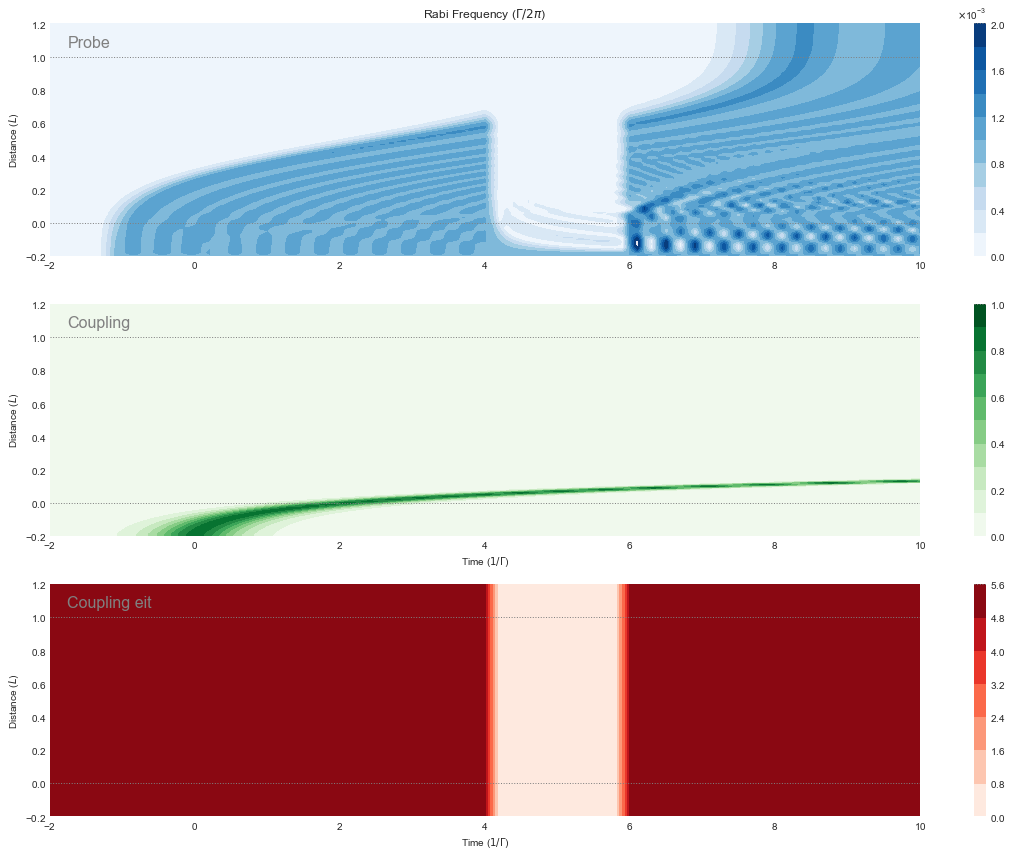

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(311)
cmap_range = np.linspace(0.0, 2e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(312)
cmap_range = np.linspace(0.0, 1.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(313)
# cmap_range = np.linspace(0.0, 1.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[2]/(2*np.pi)), 
#                  cmap_range, 
                 cmap=plt.cm.Reds)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling eit',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()

plt.savefig('images/{0}_1.png'.format(NOTEBOOK_NAME))

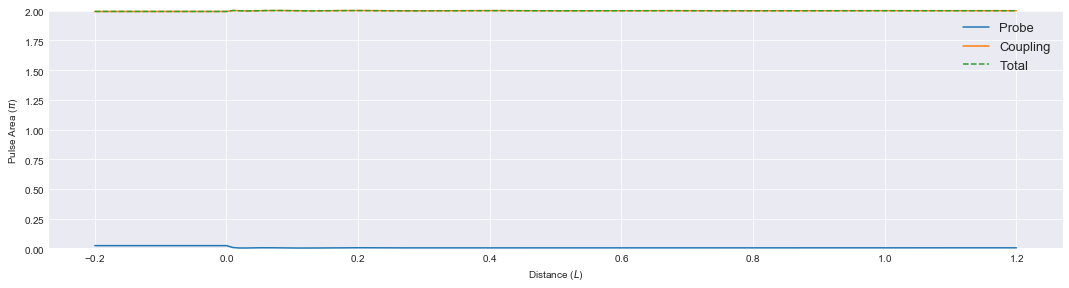

In [6]:
total_area = np.sqrt(mb_solve_00.fields_area()[0]**2 + mb_solve_00.fields_area()[1]**2)

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi, label='Probe', clip_on=False)
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[1]/np.pi, label='Coupling', clip_on=False)
ax.plot(mb_solve_00.zlist, total_area/np.pi, label='Total', ls='dashed', clip_on=False)
ax.legend()
ax.set_ylim([0.0, 2.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)');